# Jupyter Notebook

This is a Jupyter Notebook, which is a basically just a super fancy Python shell.

You may have "cells" that can either be text (like this one) or executable Python code. Notebooks are really nice because they allow you to rapidly develop Python code by writing small bits of code, testing their output, and moving on to the next bit; this interactive nature of the notebook is a huge plus to professional Python developers. 

It's also nice, because it's really easy to share your code with others and surround it with text to tell a story! 

# Colaboratory
Colaboratory is a service provided by Google to take a Jupyter Notebook (a standard formay of a `.ipynb` file) and let users edit/run the code in the notebook for free! 

This notebook is write-protected so you are not able to edit the  notebook that the whole class will look at, but you are able to open up the notebook in "playground mode" which lets you make edits to a temporary copy of the notebook. If you want to save the changes you made to this notebook, you will have to follow the instructions when you try to save to copy the notebook to your Google Drive. 

# Setup
Make sure you run the following cell(s) before trying to run any the following cells. You do not need to understand what they are doing, it's just a way to make sure there is a file we want to use stored on the computer running this notebook.


In [ ]:
import graphviz 
import pandas as pd
import requests
from sklearn.tree import export_graphviz


def save_file(url, file_name):
  r = requests.get(url)
  with open(file_name, 'wb') as f:
    f.write(r.content)

def plot_tree(model, X, y):
  dot_data = export_graphviz(model, out_file=None, 
                      feature_names=X.columns,  
                      class_names=y.unique(),  
                      filled=True, rounded=True,  
                      special_characters=True) 
  return graphviz.Source(dot_data)

save_file('https://courses.cs.washington.edu/courses/cse163/19sp/' +
          'files/lectures/04-19/iris.csv', 'iris.csv')
save_file('https://courses.cs.washington.edu/courses/cse163/19sp/' +
          'files/lectures/04-19/titanic.csv', 'titanic.csv')

First we load both datasets that we will use for this lecture. The first is a dataset of irises (the flower) while the second is a lsit of passengers on the Titanic that indicates if they survived the crash.

In [ ]:
iris = pd.read_csv('iris.csv')
titanic = pd.read_csv('titanic.csv')

# Iris 

In [ ]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


First we need separate the data into the **features** and the **labels** so that we can indicate which columns correspond to which.

In [ ]:
X = iris.loc[:, iris.columns != 'species']
y = iris['species']

In [ ]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
5         setosa
6         setosa
7         setosa
8         setosa
9         setosa
10        setosa
11        setosa
12        setosa
13        setosa
14        setosa
15        setosa
16        setosa
17        setosa
18        setosa
19        setosa
20        setosa
21        setosa
22        setosa
23        setosa
24        setosa
25        setosa
26        setosa
27        setosa
28        setosa
29        setosa
         ...    
120    virginica
121    virginica
122    virginica
123    virginica
124    virginica
125    virginica
126    virginica
127    virginica
128    virginica
129    virginica
130    virginica
131    virginica
132    virginica
133    virginica
134    virginica
135    virginica
136    virginica
137    virginica
138    virginica
139    virginica
140    virginica
141    virginica
142    virginica
143    virginica
144    virginica
145    virginica
146    virginica
147    virgini

We then went ahead and created a decision tree that learned from the data. At this point, we did not talk about what a Decision tree was, just what the code was to create one. We then investigated what it look like and how it was created here and on the slides.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

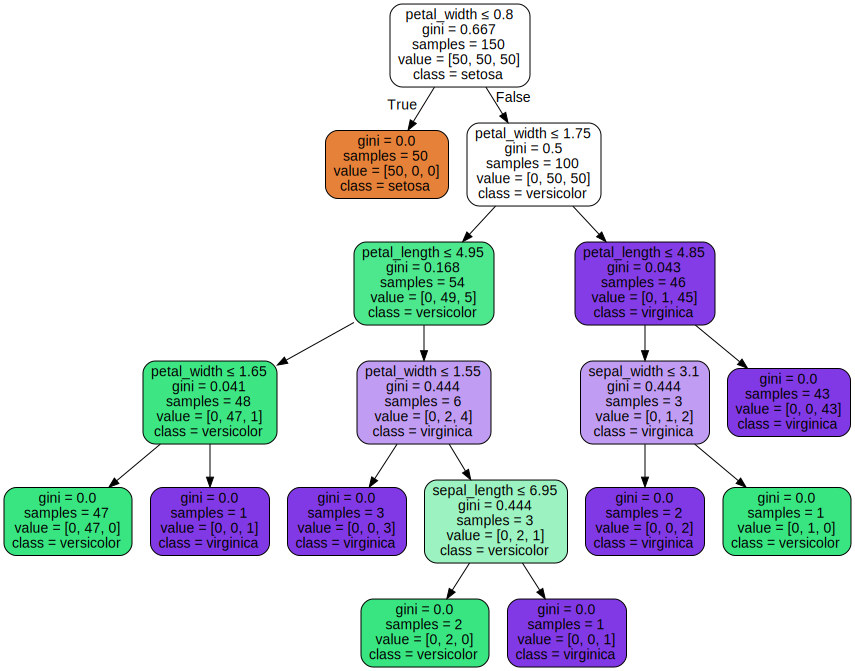

In [ ]:
plot_tree(model, X, y)

# Titanic
We saw how to train a model in the last section, but now we want to train a model and evaluate its performance. This is somewhat difficult with the Iris dataset since it's so small and relatively predictable, so we use a larger dataset below.

In [ ]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
0,no,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,False
1,yes,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,False
2,yes,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,True
3,yes,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,False
4,no,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,True
5,no,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,True
6,no,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,True
7,no,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,False
8,yes,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,False
9,yes,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,False


Again, we start by separating the data into the X (features) and y (labels). This is different than before because we must


*   Drop the null values. We have to drop the nulls before we split into X and y, otherwise we won't now which X's correspond with which y's. 
*  This dataset has string features which does not work with scikit-learn. We must encode the string columns using `get_dummies` to turn string features into integers. It does not suffice to just turn "man" into the value 1 and "woman" into the value 2, since that sets up a quantative relationship that means "woman" is one more than "man" which is also twice as much as "man" which doesn't quite make sense. Instead the `get_dummies` makes a "one-hot encoding" of the data by creating multiple columns for the original column (sex) which have 1s or 0s indicating which value was present. Notice that there are now two columns sex_female and sex_male.




In [ ]:
titanic = titanic.dropna()
X = titanic.loc[:, titanic.columns != 'survived']
X = pd.get_dummies(X)
y = titanic['survived']

In [ ]:
X

,pclass,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,embarked_C,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,3,22.0,1,0,7.2500,True,False,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,1,38.0,1,0,71.2833,False,False,1,0,1,...,0,0,1,0,0,0,0,1,0,0
2,3,26.0,0,0,7.9250,False,True,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,35.0,1,0,53.1000,False,False,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,3,35.0,0,0,8.0500,True,True,0,1,0,...,0,0,0,0,0,0,0,0,0,1
5,3,NaN,0,0,8.4583,True,True,0,1,0,...,0,0,0,0,0,0,0,0,1,0
6,1,54.0,0,0,51.8625,True,True,0,1,0,...,0,0,0,0,1,0,0,0,0,1
7,3,2.0,3,1,21.0750,False,False,0,1,0,...,0,0,0,0,0,0,0,0,0,1
8,3,27.0,0,2,11.1333,False,False,1,0,0,...,0,0,0,0,0,0,0,0,0,1
9,2,14.0,1,0,30.0708,False,False,1,0,1,...,0,0,0,0,0,0,0,1,0,0


Like before, we train the model and it works successfuly. We can also print it out and it will be much larger

In [ ]:
model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [ ]:
plot_tree(model, X, y)

Learning models is cool and all, but we are doing this in the first place so we can make predictions using our data. Every model has a `predict` function that will make a prediciton for each row of the given dataset.

In [ ]:
y_pred = model.predict(X)

In [ ]:
y_pred

array(['yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'no',
       'no', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no',
       'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no',
       'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes',
       'yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'yes', 'yes',
       'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes',
       'no', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'no',
       'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'no',
       'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'no

To test out how well the model is doing , we want to compute the **accuracy**. The accuracy is the ratio of labels it predicted correctly to the total size of the dataset being predicted. scikit-learn provides a function to compute this.

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y, y_pred)

1.0

Wow! this is amazing! We made a classsifier that is 100% correct which means we basically solved all of ML. 

This isn't quite the whole story unfortunately. The reason we get 100% accuracy is because we are evaluating our model on the data it learned from and the tree was able to grow really tall so it could have rules for potentially every data point in the dataset. Remember, a core part of our goal was to make a model that would peform well on future data, not data that we have already seen. We would not expect that our model would work 100% on unseen data just because it got 100% train accuracy. This is like saying "Well, I have been studying for this exam and I was able to get 100% accuracy on the practice test after studying it for a few hours, therefore I would expect to get 100% on the actual exam". Predicting your performance in the future based on a test you've already seen the answers to will probably not lead to the outcome you predicted. 

To solve this, we generally need to split out data up into a **training set** and a **test set**, where we withhold the data in the test set from training so we can use it as a proxy for future data when evaluating our model. Unsuprisingly, scikit-learn provides a function to help us split up the data randomly.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
print(len(X_train), len(X_test))

145 37


In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

As before, it's not suprising that the tree is able to get 100% accuracy on the training set

In [ ]:
accuracy_score(y_train, model.predict(X_train))

1.0

But now, on data that this model has not seen before (during training), it makes mistakes about 1/4 of the time. 

In [ ]:
accuracy_score(y_test, model.predict(X_test))

0.7567567567567568

-----
Below is a section that we did not get to in lecture, but included in this notes because I think it's fun. 

The reason the tree is able to get 100% training accuracy is because it is allowed to grow as tall as it wants, which means it can make arbitrarly complex decision rules. This complexity makes it much more likely to overfit on a dataset of this size. 

One way to stop overfitting is to cap how complex the model can be. For the case of decision trees, the most straight-forward way to do this is to limit the height of the tree. Below I have some code that tries to train DecisionTrees of different heights and plots their train errors and test errors. 

From the graphs you can see
* When the max_depth is low, the train accuracy and the test accuracy are low. This is because the model is too constrained and is not able to learn anything useful.
* As the height of the tree is allowed to increase, we see the train accuracy and the test accuracy go up.
* The train accuracy will continue to grow until it hits 1.0 as the tree continues to become more and more complex. The test accuracy also increases, but eventually hits a point (around height 4) where increasing the heigh actually causes a decrease in the test acuracy. This is the point where we are starting to overfit to the training set and become to specifc to the trends we see there that stop us from generalizing well. This is the point in the slides where we transition from the nice curve in the middle to the overfitting region that has really whacky decision boundaries. 

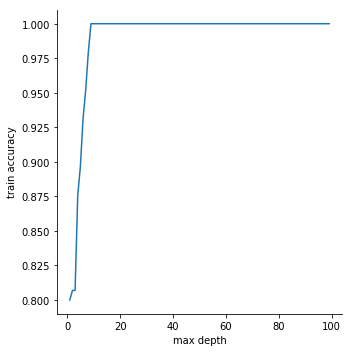

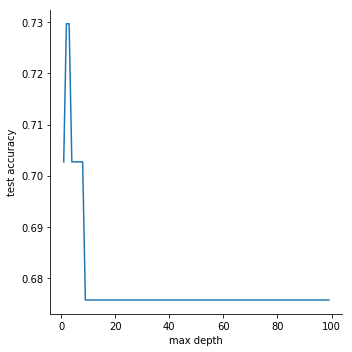

In [ ]:
import seaborn as sns
sns.set()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=1)
data = []
for i in range(1, 100):
  model = DecisionTreeClassifier(max_depth=i, random_state=1)
  model.fit(X_train, y_train)
  
  y_train_pred = model.predict(X_train)
  train_acc = accuracy_score(y_train, y_train_pred)
  
  y_test_pred = model.predict(X_test)
  test_acc = accuracy_score(y_test, y_test_pred)
  
  data.append({'max depth': i, 'train accuracy': train_acc, 
               'test accuracy': test_acc})
  

data = pd.DataFrame(data)
sns.relplot(kind='line', x='max depth', y='train accuracy', data=data)
sns.relplot(kind='line', x='max depth', y='test accuracy', data=data)